In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sympy import *
from scipy.optimize import minimize
import scipy.linalg as la
from sklearn.decomposition import PCA

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def get_cos(xv, yv):
    xv_yv_dot = np.dot(xv, yv)
    leghth_xv = np.sqrt(np.dot(xv, xv))
    leghth_yv = np.sqrt(np.dot(yv, yv))
    cos_xy = xv_yv_dot / (leghth_xv * leghth_yv)
    return cos_xy

In [4]:
for i, user in enumerate(raitings):
    min_cos = 1
    best_pair = ()
    other_users = np.delete(raitings, i, axis=0)
    for j, other_user in enumerate(other_users):
        cos = get_cos(user, other_user)
#         print(user, other_user, cos)
        if cos < min_cos:
            min_cos = cos
            best_pair = (raitings[i],other_users[j])
    print(best_pair)
#     break

(array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6]), array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]))
(array([ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7]), array([ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3]))
(array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6]), array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]))
(array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]), array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]))
(array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]), array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]))
(array([ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1]), array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]))
(array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]), array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6]))
(array([ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
# сокращение размерности при помощи PCA

pca_5c = PCA(n_components=5)
pca_5c.fit(raitings)
print(pca_5c.explained_variance_ratio_)
print(pca_5c.singular_values_)

[0.25373748 0.1970209  0.14113306 0.12956371 0.11289928]
[16.91716582 14.90704109 12.61681323 12.08862725 11.28446283]


In [6]:
pca_5c.fit_transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [10]:
x = Symbol('x')

In [11]:
function = (tan(sin(x)+cos(x*2+3)))**2

In [12]:
partialderiv = Derivative(function, x)
partialderiv.doit()

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [13]:
partialderiv.doit().subs(x,'1')

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

 <img src="2.jpg" />

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [14]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [15]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [16]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

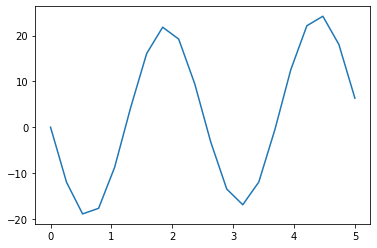

In [17]:
plt.plot(x, fx)
plt.show()

In [18]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [19]:
res = minimize(error,[10,10], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.000102
         Iterations: 67
         Function evaluations: 135


 final_simplex: (array([[ 2.99999993, 21.37610432],
       [ 3.00000013, 21.37610397],
       [ 2.99999945, 21.37610402]]), array([0.00010237, 0.00013293, 0.0001788 ]))
           fun: 0.00010237094903331467
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 67
        status: 0
       success: True
             x: array([ 2.99999993, 21.37610432])

In [20]:
res.x

array([ 2.99999993, 21.37610432])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [21]:
num_of_values = 20
size_of_sample = 50
num_of_samples = 1000

In [22]:
sample_average = []

counter_samples_sums = 0

while counter_samples_sums < num_of_samples:
    counter_samples_sums += 1
    sample_values = []
    counter_samples = 0

    while counter_samples < size_of_sample:
        counter_samples += 1
        values = np.random.randint(1000,size=num_of_values)
        sample_values.append(values)
    sample_average.append(np.average(sample_values))

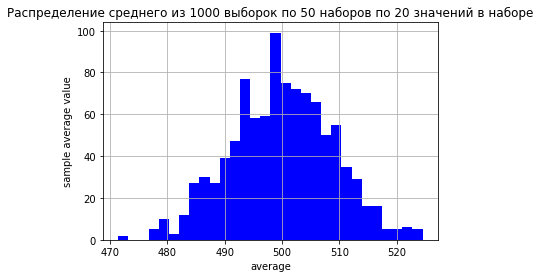

In [23]:
n, bins, patches = plt.hist(sample_average, 30, facecolor='b')

plt.xlabel('average')
plt.ylabel('sample average value')
plt.title('Распределение среднего из 1000 выборок по 50 наборов по 20 значений в наборе')
plt.grid(True)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [24]:
m = np.array([[1, 4],
             [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [25]:
results = la.eig(m)
print("Собственные значения матрицы: \t", results[0].real)
print(f"Собственные векторы матрицы: V1 {results[1].T[0]} и V2 {results[1].T[1]}")

Собственные значения матрицы: 	 [ 3. -1.]
Собственные векторы матрицы: V1 [0.89442719 0.4472136 ] и V2 [-0.89442719  0.4472136 ]


 <img src="5.jpg" />